<a href="https://colab.research.google.com/github/Sachinsn19/Loan-Status-Prediction/blob/main/Loan_Status_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Importing the Dependencies

In [98]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import warnings
warnings.filterwarnings('ignore')

## Data collection and Preprocessing

dataset : [Loan status](https://www.kaggle.com/ninzaami/loan-predication)

In [99]:
#Loading the dataset into pandas dataframe
loan_data = pd.read_csv('/content/loan_status.csv')

In [100]:
#Printing top 5 rows of the dataset
loan_data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [101]:
#Number of rows and columns
loan_data.shape

(614, 13)

In [102]:
#Printing column names
loan_data.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [103]:
#Informations about dataset
loan_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [104]:
#Statistical measures of the dataset
loan_data.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [105]:
#Checking for missing values
loan_data.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [106]:
#Percentage of missing values
np.round(loan_data.isnull().sum()/loan_data.shape[0],2)

Loan_ID              0.00
Gender               0.02
Married              0.00
Dependents           0.02
Education            0.00
Self_Employed        0.05
ApplicantIncome      0.00
CoapplicantIncome    0.00
LoanAmount           0.04
Loan_Amount_Term     0.02
Credit_History       0.08
Property_Area        0.00
Loan_Status          0.00
dtype: float64

There is only small number of missing values present in the dataset. 

In [107]:
#Dropping the missing values
loan_data.dropna(axis=0,inplace=True)

We can't apply imputation method in this dataset, because the dataset contains more categorical columns other than numerical columns.

In [108]:
np.round(loan_data.isnull().sum()/loan_data.shape[0],2)

Loan_ID              0.0
Gender               0.0
Married              0.0
Dependents           0.0
Education            0.0
Self_Employed        0.0
ApplicantIncome      0.0
CoapplicantIncome    0.0
LoanAmount           0.0
Loan_Amount_Term     0.0
Credit_History       0.0
Property_Area        0.0
Loan_Status          0.0
dtype: float64

Here we can see that there is no missing values now.

In [109]:
#Label encoding
loan_data['Loan_Status'].replace({'Y':1,'N':0},inplace=True)
loan_data['Loan_Status'] = loan_data['Loan_Status'].astype('int64')

In [110]:
loan_data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,0
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,1
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,1
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,1
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,1


In [111]:
#Finding categorical columns
loan_data.select_dtypes(include=['object']).columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'Property_Area'],
      dtype='object')

In [112]:
#Dependents columns values
loan_data['Dependents'].value_counts()

0     274
2      85
1      80
3+     41
Name: Dependents, dtype: int64

In [113]:
#Replacing value 3+  to 4
#loan_data['Dependents'].replace({'3+':4},inplace=True)
loan_data['Dependents'].replace(to_replace='3+', value=4, inplace=True)

In [114]:
loan_data['Dependents'].value_counts()

0    274
2     85
1     80
4     41
Name: Dependents, dtype: int64

In [115]:
loan_data['Dependents'] = loan_data['Dependents'].astype('int64')

In [116]:
loan_data['Dependents'].dtype

dtype('int64')

## Data visualization

In [117]:
loan_data.select_dtypes(include=['object']).columns

Index(['Loan_ID', 'Gender', 'Married', 'Education', 'Self_Employed',
       'Property_Area'],
      dtype='object')

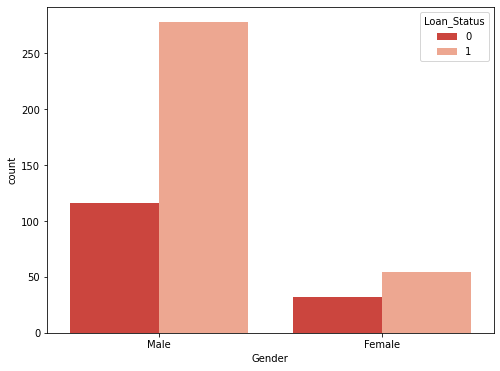

In [118]:
#Gender and Loan status
plt.figure(figsize=(8,6))
sns.countplot(x='Gender', hue='Loan_Status',palette='Reds_r', data=loan_data)
plt.show()

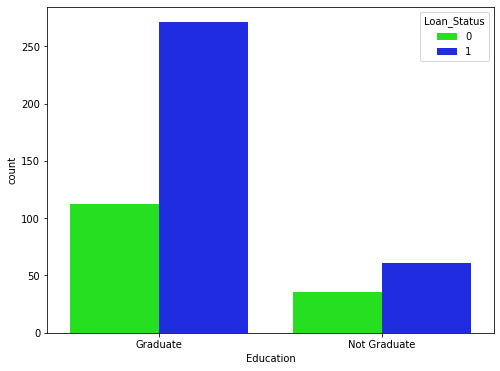

In [119]:
#Education and Loan status
plt.figure(figsize=(8,6))
sns.countplot(x='Education', hue='Loan_Status',palette='hsv', data=loan_data)
plt.show()

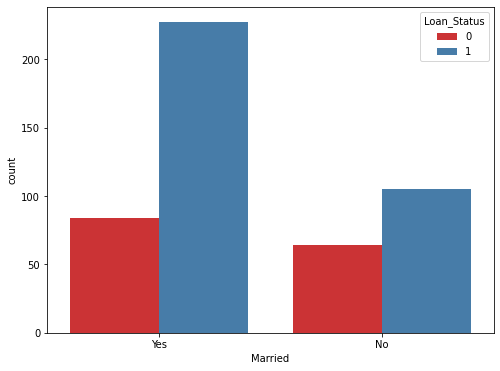

In [120]:
#Marital status and Loan status
plt.figure(figsize=(8,6))
sns.countplot(x='Married', hue='Loan_Status', data=loan_data, palette='Set1')
plt.show()

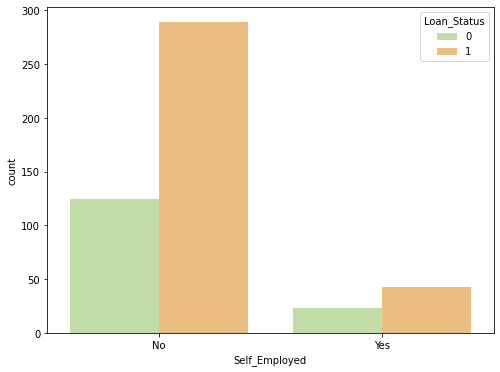

In [121]:
#Self_Employed and Loan status
plt.figure(figsize=(8,6))
sns.countplot(x='Self_Employed', hue='Loan_Status', data=loan_data, palette='Spectral_r')
plt.show()

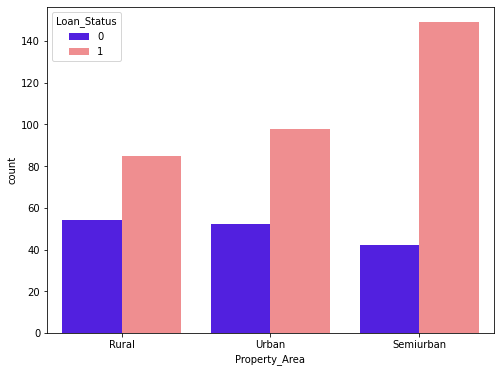

In [122]:
#Property_Area and Loan status
plt.figure(figsize=(8,6))
sns.countplot(x='Property_Area', hue='Loan_Status', data=loan_data, palette='gnuplot2')
plt.show()

In [123]:
#Printing categorical columns
loan_data.select_dtypes('object').columns

Index(['Loan_ID', 'Gender', 'Married', 'Education', 'Self_Employed',
       'Property_Area'],
      dtype='object')

In [124]:
#Printing categorical columns and their unique values
categorical_columns = ['Gender', 'Married', 'Education', 'Self_Employed', 'Property_Area']
for column in categorical_columns:
  print(column)
  print(loan_data[column].unique())

Gender
['Male' 'Female']
Married
['Yes' 'No']
Education
['Graduate' 'Not Graduate']
Self_Employed
['No' 'Yes']
Property_Area
['Rural' 'Urban' 'Semiurban']


In [125]:
#Convert Categorical column values to numerical values
loan_data.replace({'Gender':{'Male':1,'Female':0},'Married':{'Yes':1, 'No':0},'Education':{'Graduate':1, 'Not Graduate':0},
                   'Self_Employed':{'No':0, 'Yes':1}, 'Property_Area':{'Rural':0, 'Urban':2, 'Semiurban':1}},inplace=True)

In [126]:
loan_data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,LP001003,1,1,1,1,0,4583,1508.0,128.0,360.0,1.0,0,0
2,LP001005,1,1,0,1,1,3000,0.0,66.0,360.0,1.0,2,1
3,LP001006,1,1,0,0,0,2583,2358.0,120.0,360.0,1.0,2,1
4,LP001008,1,0,0,1,0,6000,0.0,141.0,360.0,1.0,2,1
5,LP001011,1,1,2,1,1,5417,4196.0,267.0,360.0,1.0,2,1


In [127]:
#Seperating data and label
X = loan_data.drop(columns=['Loan_ID', 'Loan_Status'], axis=1)
y = loan_data['Loan_Status']
print(X)
print(y)

     Gender  Married  ...  Credit_History  Property_Area
1         1        1  ...             1.0              0
2         1        1  ...             1.0              2
3         1        1  ...             1.0              2
4         1        0  ...             1.0              2
5         1        1  ...             1.0              2
..      ...      ...  ...             ...            ...
609       0        0  ...             1.0              0
610       1        1  ...             1.0              0
611       1        1  ...             1.0              2
612       1        1  ...             1.0              2
613       0        0  ...             0.0              1

[480 rows x 11 columns]
1      0
2      1
3      1
4      1
5      1
      ..
609    1
610    1
611    1
612    1
613    0
Name: Loan_Status, Length: 480, dtype: int64


## Train Test Split

In [128]:
X_train, X_test, y_train, y_test =train_test_split(X,y, test_size=0.1, stratify=y, random_state=2)

In [129]:
print(X.shape, X_train.shape, X_test.shape)

(480, 11) (432, 11) (48, 11)


## Training the model

Support Vector Machine model

In [130]:
classifier = svm.SVC(kernel='linear')

In [131]:
#Training the model
classifier.fit(X_train,y_train)

SVC(kernel='linear')

## Evaluation

In [132]:
#Accuracy score on training data
training_data_predict = classifier.predict(X_train)
training_data_accuracy = accuracy_score(y_train, training_data_predict)

In [133]:
print("Accuracy score on training dataset : ",training_data_accuracy)

Accuracy score on training dataset :  0.7986111111111112


In [134]:
#Accuracy score on test data
test_data_predict = classifier.predict(X_test)
test_data_accuracy = accuracy_score(y_test, test_data_predict)

In [135]:
print("Accuracy score on training dataset : ",test_data_accuracy)

Accuracy score on training dataset :  0.8333333333333334


## Making Predictive System

In [141]:
 X_test[:1]

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
368,1,1,1,1,0,6325,0.0,175.0,360.0,1.0,1


In [142]:
X_new = X_test[:1]
prediction = classifier.predict(X_new)
print(prediction)
if (prediction[0]==0):
  print("The bank will not provide Loan")
else:
  print("The bank will provide Loan")

[1]
The bank will provide Loan


In [138]:
 y_test[:1]

368    1
Name: Loan_Status, dtype: int64

So we can see that prediction is exactly same as in test data.

## ...................THANK YOU....................